In [1]:
import pandas as pd
import numpy as np
import GetPoolData
import ResetStrategy
import ActiveStrategyFramework
import itertools
import web3
from dotenv import dotenv_values

BITQUERY_API_TOKEN = dotenv_values('.env').get('BITQUERY_API_TOKEN')
INFURA_API_KEY = dotenv_values('.env').get('INFURA_API_KEY')

############################# set the variables #############################


ETH_UNI3_POOLs = {
    'aave_usd':{
      'quoteAddress':'0x4da27a545c0c5b758a6ba100e3a049001de870f5',
      'baseAddress':'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
    },
    'ape_usd':{
      'quoteAddress':'0x4d224452801ACEd8B2F0aebE155379bb5D594381',
      'baseAddress':'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
    },
    'wavax_usd': {
      'quoteAddress':'0x85f138bfEE4ef8e540890CFb48F620571d67Eda3',
      'baseAddress':'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
    },
    'wbnb_usd': {
      'quoteAddress':'0x418D75f65a02b3D53B2418FB8E1fe493759c7605',
      'baseAddress':'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
    },
    'wbtc_usd': {
      'quoteAddress':'0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599',
      'baseAddress':'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
    },
    'crv_usd': {
      'quoteAddress':'0xD533a949740bb3306d119CC777fa900bA034cd52',
      'baseAddress':'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
    },
    'weth_usd': {
      'quoteAddress':'0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2',
      'baseAddress':'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
    },
    'ftm_usd':{
      'quoteAddress': '0x4E15361FD6b4BB609Fa63C81A2be19d873717870',
      'baseAddress':'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
    },
    'link_usd':{
      'quoteAddress': '0x514910771AF9Ca656af840dff83E8264EcF986CA',
      'baseAddress':'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
    },
    'matic_usd':{
      'quoteAddress': '0x7D1AfA7B718fb893dB30A3aBc0Cfc608AaCfeBB0',
      'baseAddress':'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
    },
    'near_usd':{
      'quoteAddress': '0x85F17Cf997934a597031b2E18a9aB6ebD4B9f6a4',
      'baseAddress':'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
    },
    'sand_usd':{
      'quoteAddress': '0x3845badAde8e6dFF049820680d1F14bD3903a5d0',
      'baseAddress':'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
    },
    'wsol_usd':{
      'quoteAddress': '0xD31a59c85aE9D8edEFeC411D448f90841571b89c',
      'baseAddress':'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
    }
}

OP_PERP_POOLs = {
    "vAAVE": {
      "address": "0x34235C8489b06482A99bb7fcaB6d7c467b92d248",
      "createdBlockNumber": 5790050,
      "name": "contracts/BaseToken.sol:BaseToken"
    },
    "vAPE": {
      "address": "0x9d34F1D15C22e4C0924804e2a38cBe93DFB84bc2",
      "createdBlockNumber": 6131878,
      "name": "contracts/BaseToken.sol:BaseToken"
    },
    "vAVAX": {
      "address": "0x5FAa136Fc58B6136fFDAeAAC320076C4865c070F",
      "createdBlockNumber": 2390611,
      "name": "contracts/BaseToken.sol:BaseToken"
    },
    "vBNB": {
      "address": "0xb6599Bd362120Dc70D48409B8a08888807050700",
      "createdBlockNumber": 4533613,
      "name": "contracts/BaseToken.sol:BaseToken"
    },
    "vBTC": {
      "address": "0x86f1e0420c26a858fc203A3645dD1A36868F18e5",
      "createdBlockNumber": 513665,
      "name": "contracts/BaseToken.sol:BaseToken"
    },
    "vCRV": {
      "address": "0x7161C3416E08AbAa5cd38E68D9A28E43a694e037",
      "createdBlockNumber": 2888896,
      "name": "contracts/BaseToken.sol:BaseToken"
    },
    "vETH": {
      "address": "0x8C835DFaA34e2AE61775e80EE29E2c724c6AE2BB",
      "createdBlockNumber": 513630,
      "name": "contracts/BaseToken.sol:BaseToken"
    },
    "vFTM": {
      "address": "0x2dB8d2DB86cA3a4C7040E778244451776570359B",
      "createdBlockNumber": 4231054,
      "name": "contracts/BaseToken.sol:BaseToken"
    },
    "vLINK": {
      "address": "0x2F198182eC54469195a4A06262a9431A42462373",
      "createdBlockNumber": 3593244,
      "name": "contracts/BaseToken.sol:BaseToken"
    },
    "vMATIC": {
      "address": "0xBe5de48197fc974600929196239E264EcB703eE8",
      "createdBlockNumber": 5465562,
      "name": "contracts/BaseToken.sol:BaseToken"
    },
    "vNEAR": {
      "address": "0x3Fb3282e3BA34A0Bff94845f1800Eb93CC6850d4",
      "createdBlockNumber": 4078687,
      "name": "contracts/BaseToken.sol:BaseToken"
    },
    "vSAND": {
      "address": "0x333b1eA429a88d0dd48cE7C06C16609CD76F43A8",
      "createdBlockNumber": 3391517,
      "name": "contracts/BaseToken.sol:BaseToken"
    },
    "vSOL": {
      "address": "0x151Bb01c79F4516c233948D69daE39869BCcB737",
      "createdBlockNumber": 2499786,
      "name": "contracts/BaseToken.sol:BaseToken"
    }
}

abi = [{'inputs': [], 'stateMutability': 'nonpayable', 'type': 'constructor'}, {'anonymous': False, 'inputs': [{'indexed': True, 'internalType': 'uint24', 'name': 'fee', 'type': 'uint24'}, {'indexed': True, 'internalType': 'int24', 'name': 'tickSpacing', 'type': 'int24'}], 'name': 'FeeAmountEnabled', 'type': 'event'}, {'anonymous': False, 'inputs': [{'indexed': True, 'internalType': 'address', 'name': 'oldOwner', 'type': 'address'}, {'indexed': True, 'internalType': 'address', 'name': 'newOwner', 'type': 'address'}], 'name': 'OwnerChanged', 'type': 'event'}, {'anonymous': False, 'inputs': [{'indexed': True, 'internalType': 'address', 'name': 'token0', 'type': 'address'}, {'indexed': True, 'internalType': 'address', 'name': 'token1', 'type': 'address'}, {'indexed': True, 'internalType': 'uint24', 'name': 'fee', 'type': 'uint24'}, {'indexed': False, 'internalType': 'int24', 'name': 'tickSpacing', 'type': 'int24'}, {'indexed': False, 'internalType': 'address', 'name': 'pool', 'type': 'address'}], 'name': 'PoolCreated', 'type': 'event'}, {'inputs': [{'internalType': 'address', 'name': 'tokenA', 'type': 'address'}, {'internalType': 'address', 'name': 'tokenB', 'type': 'address'}, {'internalType': 'uint24', 'name': 'fee', 'type': 'uint24'}], 'name': 'createPool', 'outputs': [{'internalType': 'address', 'name': 'pool', 'type': 'address'}], 'stateMutability': 'nonpayable', 'type': 'function'}, {'inputs': [{'internalType': 'uint24', 'name': 'fee', 'type': 'uint24'}, {'internalType': 'int24', 'name': 'tickSpacing', 'type': 'int24'}], 'name': 'enableFeeAmount', 'outputs': [], 'stateMutability': 'nonpayable', 'type': 'function'}, {'inputs': [{'internalType': 'uint24', 'name': '', 'type': 'uint24'}], 'name': 'feeAmountTickSpacing', 'outputs': [{'internalType': 'int24', 'name': '', 'type': 'int24'}], 'stateMutability': 'view', 'type': 'function'}, {'inputs': [{'internalType': 'address', 'name': '', 'type': 'address'}, {'internalType': 'address', 'name': '', 'type': 'address'}, {'internalType': 'uint24', 'name': '', 'type': 'uint24'}], 'name': 'getPool', 'outputs': [{'internalType': 'address', 'name': '', 'type': 'address'}], 'stateMutability': 'view', 'type': 'function'}, {'inputs': [], 'name': 'owner', 'outputs': [{'internalType': 'address', 'name': '', 'type': 'address'}], 'stateMutability': 'view', 'type': 'function'}, {'inputs': [], 'name': 'parameters', 'outputs': [{'internalType': 'address', 'name': 'factory', 'type': 'address'}, {'internalType': 'address', 'name': 'token0', 'type': 'address'}, {'internalType': 'address', 'name': 'token1', 'type': 'address'}, {'internalType': 'uint24', 'name': 'fee', 'type': 'uint24'}, {'internalType': 'int24', 'name': 'tickSpacing', 'type': 'int24'}], 'stateMutability': 'view', 'type': 'function'}, {'inputs': [{'internalType': 'address', 'name': '_owner', 'type': 'address'}], 'name': 'setOwner', 'outputs': [], 'stateMutability': 'nonpayable', 'type': 'function'}]
UNIV3_FACTORY_ADDRESS = '0x1F98431c8aD98523631AE4a59f267346ea31F984'

flipside_queries   = ['https://api.flipsidecrypto.com/api/v2/queries/b8ad3087-803a-478b-9ed3-c4f3c096bc47/data/latest',
                      'https://api.flipsidecrypto.com/api/v2/queries/de277680-5ff6-4d58-bfff-29ef114215be/data/latest',
                      'https://api.flipsidecrypto.com/api/v2/queries/669fc9f7-8b2d-4dd2-948f-668de9eb4e8a/data/latest']

w3 = web3.Web3(web3.HTTPProvider(f'https://mainnet.infura.io/v3/{INFURA_API_KEY}'))
uni_v3 = w3.eth.contract(address=UNIV3_FACTORY_ADDRESS, abi=abi)

price_data_begin         = '2022-12-01'
price_data_end           = '2022-12-31'


In [95]:
# download the price data on Mainnet
for pair, addrs in ETH_UNI3_POOLs.items():
    try:
        GetPoolData.get_price_data_bitquery(
            addrs['baseAddress'],
            addrs['quoteAddress'],
            price_data_begin,
            price_data_end,
            BITQUERY_API_TOKEN,
            pair,
            False
        )
    except Exception as e:
        print(f'Bitquery has no historical data for pair {pair}')

No data found. Please set DOWNLOAD_DATA to True to download data from Bitquery.
No data found. Please set DOWNLOAD_DATA to True to download data from Bitquery.
No data found. Please set DOWNLOAD_DATA to True to download data from Bitquery.
No data found. Please set DOWNLOAD_DATA to True to download data from Bitquery.


In [96]:
pd_obj = {}
price_data = None
for pair, addrs in ETH_UNI3_POOLs.items():
    try:
        price_data = GetPoolData.get_price_data_bitquery(
            addrs['baseAddress'],
            addrs['quoteAddress'],
            price_data_begin,
            price_data_end,
            BITQUERY_API_TOKEN,
            pair,
            False
        )
    except Exception as e:
        print(f'No {pair} data found. Skipping...')
        pass
    
    if price_data is not None:
        window_size                              = 60*12
        STRATEGY_FREQUENCY                       = 'M' 

        _data_filtered                   = ActiveStrategyFramework.aggregate_price_data(price_data,STRATEGY_FREQUENCY)
        _data_filtered_roll              = _data_filtered.quotePrice.rolling(window=window_size) 
        _data_filtered['basePrice']            = 1/_data_filtered['quotePrice']

        pd_obj[pair] = _data_filtered

No data found. Please set DOWNLOAD_DATA to True to download data from Bitquery.
No data found. Please set DOWNLOAD_DATA to True to download data from Bitquery.
No data found. Please set DOWNLOAD_DATA to True to download data from Bitquery.
No data found. Please set DOWNLOAD_DATA to True to download data from Bitquery.


In [97]:
import time, datetime
perp_obj = {}
end_date = "01/12/2022"
end_date=time.mktime(datetime.datetime.strptime(end_date, "%d/%m/%Y").timetuple())

for pool, addrs in OP_PERP_POOLs.items():
	token_name = pool.lower()[1:]
	swap_data = GetPoolData.get_swap_data(addrs['address'],f'{token_name}_usd',DOWNLOAD_DATA = False,network='optimism-perp', end_time=end_date)       
	swap_data.index = swap_data.timestamp.apply(lambda x: pd.to_datetime(x,unit='s',utc=True))
	swap_data.index = swap_data.index.floor('Min')
	swap_data = swap_data[~swap_data.index.duplicated(keep='first')]
	swap_data.drop(columns=['timestamp'],inplace=True)
	# has to fill in the 0 swappedPrice with other entreis
	for i in swap_data[swap_data.swappedPrice.astype(float) == 0].index:
		swap_data.loc[i,'swappedPrice'] = swap_data.loc[i, 'marketPriceAfter'] if swap_data.loc[i, 'marketPriceAfter'] != 0 else swap_data.loc[i-1, 'marketPriceBefore']
		
	perp_obj[token_name] = swap_data

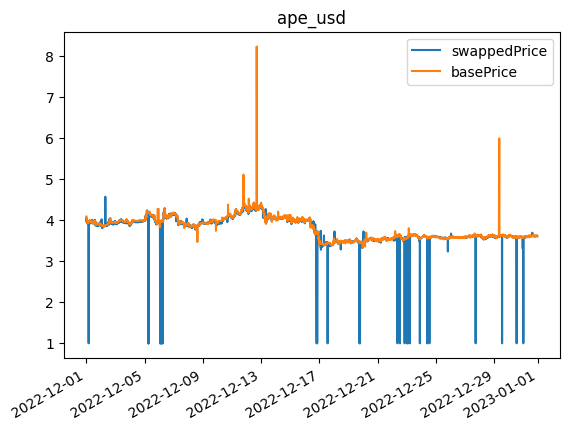

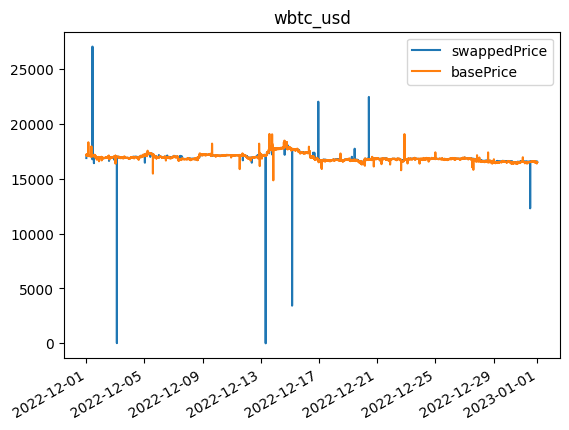

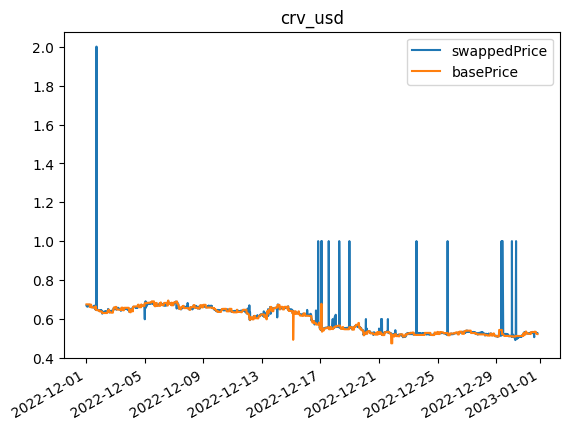

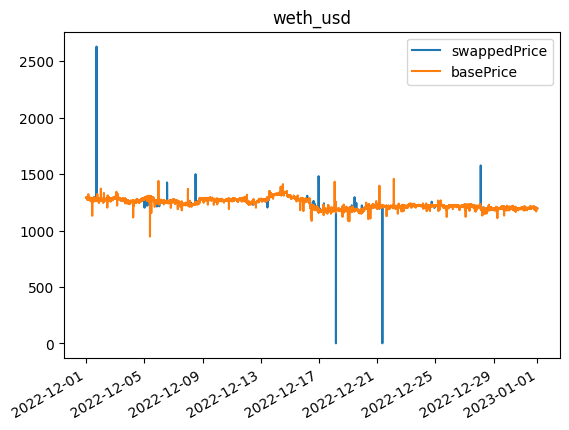

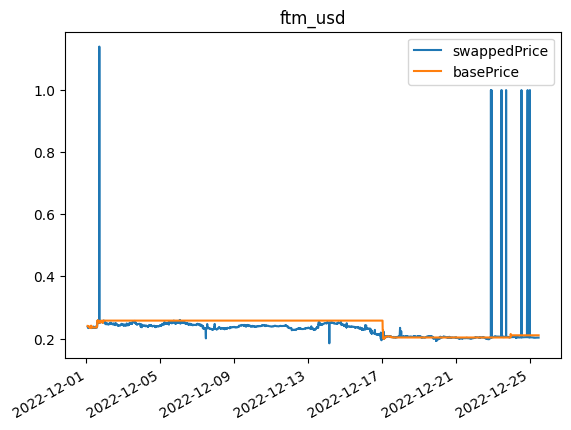

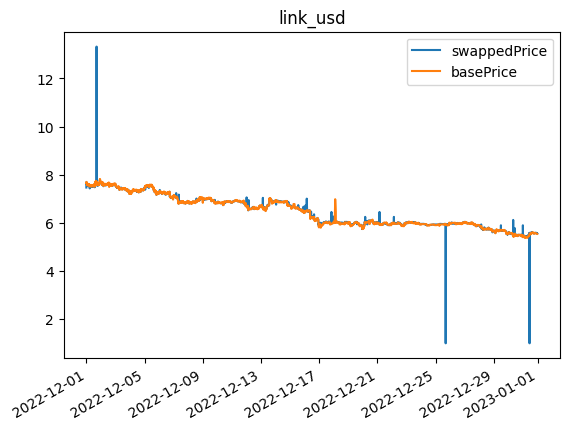

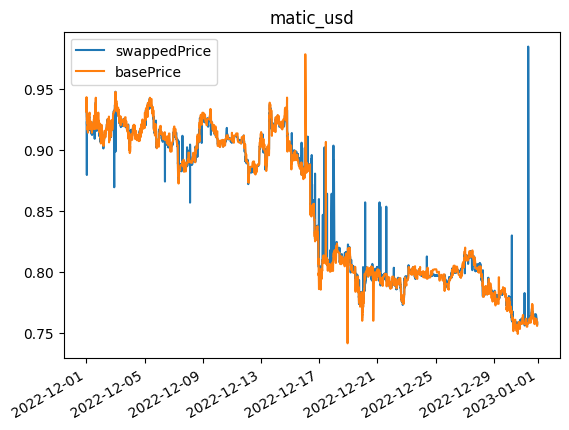

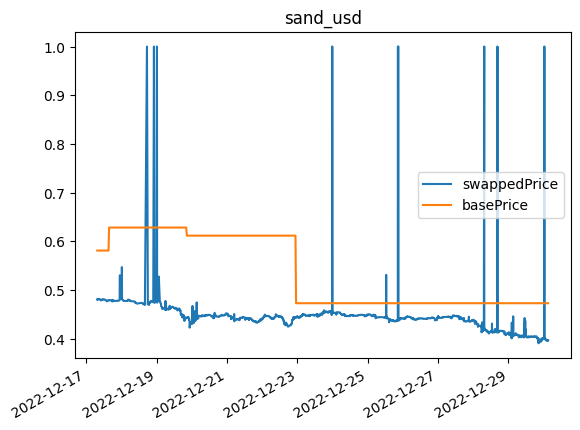

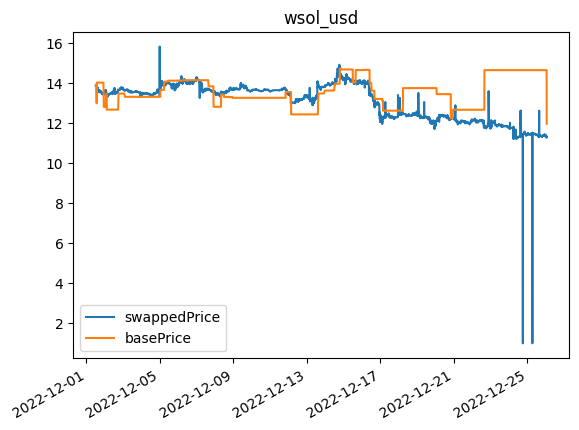

In [98]:
import matplotlib.pyplot as plt
for i, pair in enumerate(pd_obj.keys()):
	plt.figure()
	perp_pool = perp_obj[pair[:-4]] if pair[:-4] in perp_obj.keys() else perp_obj[pair[:-4][1:]]
	merged_pool = perp_pool.merge(pd_obj[pair],how='inner',left_index=True,right_index=True)

	merged_pool['swappedPrice'].astype(float).plot(y='swappedPrice')
	merged_pool['basePrice'].astype(float).plot(y='basePrice')
	plt.legend()
	plt.title(pair)

	

Text(0.5, 1.0, 'link_usd')

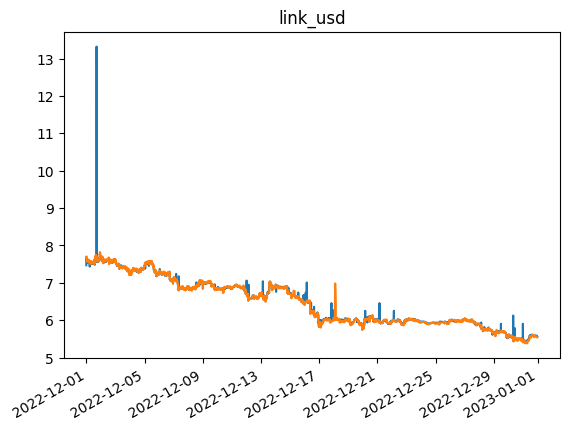

In [105]:
lower_bound = 4
upper_bound = 9
perp_df = perp_obj['link']
for i in  perp_df[perp_df.swappedPrice.astype(float) < lower_bound].index:
	perp_df.loc[i,'swappedPrice'] = perp_df.loc[i, 'marketPriceAfter'] if perp_df.loc[i, 'marketPriceAfter'] != 0 else perp_df.loc[i-1, 'marketPriceBefore']

price_df = pd_obj['link_usd']
for i in  price_df[price_df.basePrice.astype(float) > upper_bound].index:
	price_df.loc[i,'basePrice'] = price_df.shift(1).loc[i, 'basePrice']


mergeed = perp_df.merge(price_df,how='inner',left_index=True,right_index=True)
mergeed['swappedPrice'].astype(float).plot(y='swappedPrice')
mergeed['basePrice'].astype(float).plot(y='basePrice')
plt.title('link_usd')
